## Importy

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import tree
import pickle

In [2]:
data = pd.read_csv('Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
X = data.drop(labels='label',axis=1)
Y = data['label']
X = X.to_numpy()
Y = Y.to_numpy()
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

## Klasyfikacja

In [4]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.5, random_state=1410)
print(X_train.shape, X_test.shape, Y_train,Y_test)

(1100, 7) (1100, 7) ['lentil' 'apple' 'pomegranate' ... 'mungbean' 'cotton' 'orange'] ['pomegranate' 'mungbean' 'apple' ... 'apple' 'apple' 'coconut']


In [13]:
cls = DecisionTreeClassifier(random_state=1410,max_depth=10)
cls.fit(X_train,Y_train)
Y_pred = cls.predict(X_test)
bac = balanced_accuracy_score(Y_test,Y_pred)
bac

0.9766843119412368

[Text(0.7149439102564102, 0.9545454545454546, 'x[4] <= 28.627\ngini = 0.954\nsamples = 1100\nvalue = [39.0, 57.0, 53.0, 53.0, 55.0, 48.0, 44.0, 55.0, 48.0\n47.0, 47.0, 48.0, 55.0, 50.0, 44.0, 48.0, 50.0, 55.0\n45.0, 58.0, 46.0, 55.0]'),
 Text(0.6113782051282052, 0.8636363636363636, 'x[5] <= 5.984\ngini = 0.498\nsamples = 100\nvalue = [0, 0, 0, 53, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.6631610576923077, 0.9090909090909092, 'True  '),
 Text(0.5857371794871795, 0.7727272727272727, 'gini = 0.0\nsamples = 47\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.6370192307692307, 0.7727272727272727, 'gini = 0.0\nsamples = 53\nvalue = [0, 0, 0, 53, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.8185096153846154, 0.8636363636363636, 'x[1] <= 107.5\ngini = 0.949\nsamples = 1000\nvalue = [39, 57, 53, 0, 55, 48, 44, 55, 48, 0, 47, 48\n55, 50, 44, 48, 50, 55, 45, 58, 46, 55]'),
 Text(0.7667267628205128, 0.9090909090909

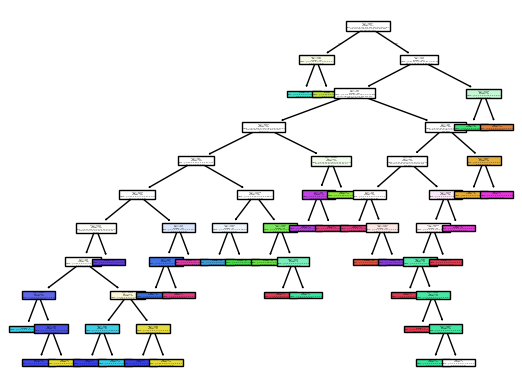

In [14]:
tree.plot_tree(cls,filled=True)

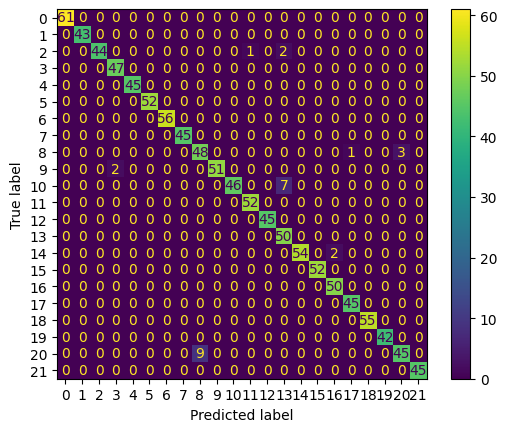

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred))
disp.plot()

In [16]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        61
      banana       1.00      1.00      1.00        43
   blackgram       1.00      0.94      0.97        47
    chickpea       0.96      1.00      0.98        47
     coconut       1.00      1.00      1.00        45
      coffee       1.00      1.00      1.00        52
      cotton       1.00      1.00      1.00        56
      grapes       1.00      1.00      1.00        45
        jute       0.84      0.92      0.88        52
 kidneybeans       1.00      0.96      0.98        53
      lentil       1.00      0.87      0.93        53
       maize       0.98      1.00      0.99        52
       mango       1.00      1.00      1.00        45
   mothbeans       0.85      1.00      0.92        50
    mungbean       1.00      0.96      0.98        56
   muskmelon       1.00      1.00      1.00        52
      orange       0.96      1.00      0.98        50
      papaya       0.98    

In [18]:
pickle.dump(cls,open('crop.sv','wb'))

In [20]:
loaded_model = pickle.load(open('crop.sv','rb'))
e = loaded_model.predict(X_test)
e

array(['pomegranate', 'mungbean', 'apple', ..., 'apple', 'apple',
       'coconut'], dtype=object)